# Multi Layer Perceptrons
This notebook explores Multi Layer Perceptrons' explainability for Heart Disease Prediction using SHAP values.

In [1]:
# Enable autoreload for imports
%load_ext autoreload
%autoreload 2

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import shap

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

from config import config

/Users/aspav/miniconda3/envs/ml4h/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the datasets
train_data = pd.read_csv(config.datapath / Path("train_data.csv"))
test_data = pd.read_csv(config.datapath / Path("test_data.csv"))

In [3]:
# Establish training and testing sets and target variable
X_train = train_data.drop(columns=["HeartDisease"])
y_train = train_data["HeartDisease"]
X_test = test_data.drop(columns=["HeartDisease"])
y_test = test_data["HeartDisease"]

# Data preprocessing and training of Logistic Lasso Regression

In [4]:
# Get numerical columns
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# KNN Imputation for missing values
imputer = KNNImputer()
X_train_imp = X_train.copy()
X_test_imp = X_test.copy()
X_train_imp[numerical_cols] = imputer.fit_transform(X_train[numerical_cols])
X_test_imp[numerical_cols] = imputer.transform(X_test[numerical_cols])

# Standard scaling
scaler = StandardScaler()
X_train_scaled = X_train_imp.copy()
X_test_scaled = X_test_imp.copy()
X_train_scaled[numerical_cols] = scaler.fit_transform(X_train_imp[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test_imp[numerical_cols])

# Train MLP classifier

mlp_model = MLPClassifier(
    hidden_layer_sizes=(100, 50),  # Two hidden layers with 100 and 50 neurons
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)
mlp_model.fit(X_train_scaled, y_train)

# Predict and print classification report
y_pred = mlp_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.34      0.45       122
           1       0.34      0.66      0.45        62

    accuracy                           0.45       184
   macro avg       0.50      0.50      0.45       184
weighted avg       0.56      0.45      0.45       184



In [5]:
explainer = shap.KernelExplainer(mlp_model.predict_proba, X_train_scaled)

Using 734 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [6]:
shap_values = explainer.shap_values(X_test_scaled)

100%|██████████| 184/184 [07:21<00:00,  2.40s/it]


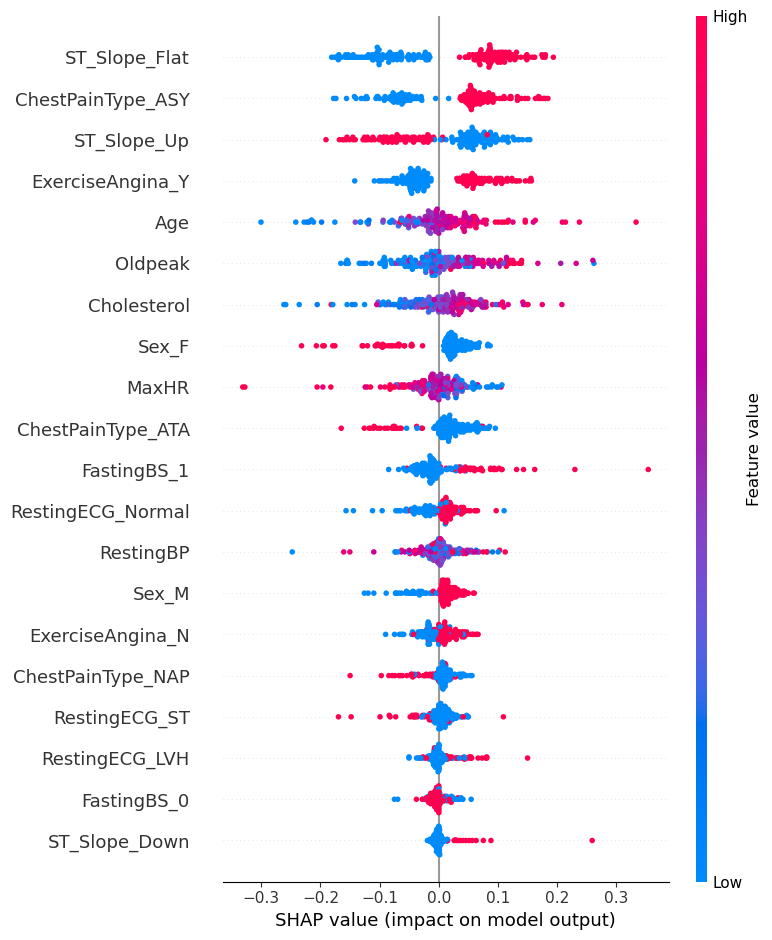

In [7]:
shap.summary_plot(shap_values[:, :, 1], X_test_scaled, feature_names=X_test_scaled.columns)

In [19]:
shap_value = explainer.shap_values(X_test_scaled.iloc[0, :])
shap.plots.force(explainer.expected_value[1], shap_value[1], X_test_scaled.iloc[0, :])

DimensionError: Length of features is not equal to the length of shap_values!